In [36]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

pd.options.display.max_colwidth = 200
%matplotlib inline


In [2]:
df = pd.read_csv('./data/train_preprocess.csv')

df.head()


,sentence,fuel,machine,others,part,price,service
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,neutral,neutral,positive,neutral,neutral,neutral
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,negative,neutral,neutral,neutral,neutral,neutral
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .",positive,positive,neutral,neutral,neutral,neutral
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,neutral,neutral,neutral,neutral,positive,neutral
4,Kalo menurut gw enak pajero si,neutral,neutral,positive,neutral,neutral,neutral


In [3]:

stemmer = StemmerFactory().create_stemmer()
wpt = nltk.WordPunctTokenizer()
stopword_factory = StopWordRemoverFactory()




def uncapitalize(doc):
    return doc.lower()


def normalize_document(doc):
    doc = uncapitalize(doc)
    doc = re.sub(r"[^a-zA-Z\s]", "", doc, re.I | re.A)
    doc = doc.strip()
    doc = wpt.tokenize(doc)
    doc = [stemmer.stem(word) for word in doc]
    doc = " ".join(doc)
    return doc





normalize_corpus = np.vectorize(normalize_document)

In [4]:
norm_corpus = normalize_corpus(list(df['sentence'])) 

# save to csv
df['clean_sentence'] = norm_corpus
df.to_csv('train_preprocess_stemmed.csv', index=False)
df.head()


,sentence,fuel,machine,others,part,price,service,clean_sentence
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,neutral,neutral,positive,neutral,neutral,neutral,saya pakai honda jazz gk tahun pertama luncur mobil nya bagus dan enak sesuai moto nya senang untuk kendara
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,negative,neutral,neutral,neutral,neutral,neutral,avanza kenapa jadi boros bensin begini dah ah baru isi sudah mau tengah saja
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .",positive,positive,neutral,neutral,neutral,neutral,saran ku dan alam ku mending beli mobil niaga l atau canter irit dan bandel
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,neutral,neutral,neutral,neutral,positive,neutral,dari segi harga juga pajero lebih mahal juta banding fortuner
4,Kalo menurut gw enak pajero si,neutral,neutral,positive,neutral,neutral,neutral,kalo turut gw enak pajero si


In [5]:
df['clean_sentence'] = norm_corpus

df.head()

,sentence,fuel,machine,others,part,price,service,clean_sentence
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,neutral,neutral,positive,neutral,neutral,neutral,saya pakai honda jazz gk tahun pertama luncur mobil nya bagus dan enak sesuai moto nya senang untuk kendara
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,negative,neutral,neutral,neutral,neutral,neutral,avanza kenapa jadi boros bensin begini dah ah baru isi sudah mau tengah saja
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .",positive,positive,neutral,neutral,neutral,neutral,saran ku dan alam ku mending beli mobil niaga l atau canter irit dan bandel
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,neutral,neutral,neutral,neutral,positive,neutral,dari segi harga juga pajero lebih mahal juta banding fortuner
4,Kalo menurut gw enak pajero si,neutral,neutral,positive,neutral,neutral,neutral,kalo turut gw enak pajero si


<h1>Bag Of Words Model</h1>

In [6]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(df['clean_sentence'])
cv_matrix

<810x1563 sparse matrix of type '<class 'numpy.int64'>'
	with 10017 stored elements in Compressed Sparse Row format>

In [7]:
print(cv_matrix)


  (0, 1216)	1
  (0, 1034)	1
  (0, 525)	1
  (0, 593)	1
  (0, 460)	1
  (0, 1365)	1
  (0, 1083)	1
  (0, 820)	1
  (0, 913)	1
  (0, 996)	2
  (0, 115)	1
  (0, 314)	1
  (0, 390)	1
  (0, 1274)	1
  (0, 927)	1
  (0, 1257)	1
  (0, 1494)	1
  (0, 692)	1
  (1, 97)	1
  (1, 686)	1
  (1, 567)	1
  (1, 220)	1
  (1, 173)	1
  (1, 159)	1
  (1, 307)	1
  :	:
  (808, 1555)	1
  (808, 337)	1
  (808, 313)	1
  (808, 1203)	1
  (808, 998)	1
  (808, 577)	1
  (808, 118)	1
  (808, 124)	1
  (808, 1506)	1
  (808, 1233)	1
  (808, 478)	1
  (808, 870)	1
  (808, 755)	1
  (808, 453)	1
  (809, 317)	1
  (809, 499)	1
  (809, 1555)	1
  (809, 298)	1
  (809, 331)	1
  (809, 382)	1
  (809, 252)	1
  (809, 865)	1
  (809, 385)	1
  (809, 210)	1
  (809, 1336)	1


In [8]:
cv_matrix = cv_matrix.toarray()
cv_matrix


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns=vocab)

,abal,abang,abangabang,abis,abs,ac,accu,ada,adalah,adik,...,yamahaid,yamahaindonesia,yang,yangg,yaudah,yg,ymh,yogyakarta,zaman,zr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<h1>Bag of N-Grams Model</h1>

In [10]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(df['clean_sentence'])

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,abal di,abang gue,abangabang naik,abis hehe,abis kalo,abs keren,ac dingin,ac enggak,ac nya,ac nyala,...,yg lebih,yg menang,yg paling,yg rush,yg sangat,yg tapi,ymh awat,yogyakarta dan,zaman nya,zr bukan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1>TF-IDF Model</h1>

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,abal,abang,abangabang,abis,abs,ac,accu,ada,adalah,adik,...,yamahaid,yamahaindonesia,yang,yangg,yaudah,yg,ymh,yogyakarta,zaman,zr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(df['clean_sentence'])
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,abal,abang,abangabang,abis,abs,ac,accu,ada,adalah,adik,...,yamahaid,yamahaindonesia,yang,yangg,yaudah,yg,ymh,yogyakarta,zaman,zr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Understanding the TF-IDF from Scratch</h1>

In [13]:
unique_words = list(
    set([word for doc in [doc.split() for doc in df['clean_sentence']] for word in doc])
)

# Create dictionary with unique words as keys, initialized to 0
def_feature_dict = {w: 0 for w in unique_words}
print(def_feature_dict)


{'vultus': 0, 'ignis': 0, 'naik': 0, 'ngga': 0, 'overall': 0, 'kualifikasi': 0, 'high': 0, 'jawa': 0, 'cuman': 0, 'minor': 0, 'cepat': 0, 'akhirakhir': 0, 'kaya': 0, 'instagram': 0, 'tp': 0, 'pamulang': 0, 'tengah': 0, 'driver': 0, 'gang': 0, 'samping': 0, 'kelapa': 0, 'payah': 0, 'semenjak': 0, 'tinggal': 0, 'tetap': 0, 'layan': 0, 'timur': 0, 'dijadiin': 0, 'sembunyi': 0, 'kandang': 0, 'kursi': 0, 'exceed': 0, 'nerima': 0, 'belah': 0, 'terlihar': 0, 'after': 0, 'per': 0, 'upgrade': 0, 'vva': 0, 'pagi': 0, 'hondaarista': 0, 'drpd': 0, 'abang': 0, 'pun': 0, 'komplain': 0, 'saranin': 0, 'alokasi': 0, 'lo': 0, 'tiap': 0, 'cabin': 0, 'kehandalan': 0, 'menesal': 0, 'kurang': 0, 'polisi': 0, 'pilih': 0, 'calya': 0, 'laku': 0, 'belakang': 0, 'tunas': 0, 'mitsubishiid': 0, 'nabrak': 0, 'brv': 0, 'buah': 0, 'vvt': 0, 'pantas': 0, 'tukar': 0, 'holder': 0, 'bom': 0, 'percaya': 0, 'uang': 0, 'scumbag': 0, 'great': 0, 'bilang': 0, 'perempuan': 0, 'sewa': 0, 'time': 0, 'jantan': 0, 'uras': 0, 'wah'

In [14]:
from collections import Counter

bow_features = []

for doc in df['clean_sentence']:
    bow_feature = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature.update(all_features)
    bow_features.append(bow_feature)
    
bow_features = pd.DataFrame(bow_features)
bow_features

,saya,pakai,honda,jazz,gk,tahun,pertama,luncur,mobil,nya,...,balap,ramai,bikin,fitur,pernah,sadar,tampang,nan,anugrah,fortuner
0,1,1,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
806,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

df_bow = np.diff(sp.csc_matrix(bow_features, dtype=int).indptr)
df_bow = 1 + df_bow

# show smoothened version of document frequencies
pd.DataFrame([df_bow], columns=feature_names)

,saya,pakai,honda,jazz,gk,tahun,pertama,luncur,mobil,nya,...,balap,ramai,bikin,fitur,pernah,sadar,tampang,nan,anugrah,fortuner
0,156,94,93,15,3,47,8,2,157,322,...,2,2,7,28,24,2,4,3,2,52


In [16]:
#compute inverse document frequency
total_docs = 1 + len(df['clean_sentence'])
print(total_docs)

total_docs_float = float(total_docs)

idf = 1.0 + np.log(float(total_docs_float)/ df_bow)

print(idf)
# show smoothened version of idf
pd.DataFrame([np.round(idf, 2)], columns=feature_names)




811
[2.64841205 3.15497327 3.16566856 ... 6.59965577 7.00512087 3.74702434]


,saya,pakai,honda,jazz,gk,tahun,pertama,luncur,mobil,nya,...,balap,ramai,bikin,fitur,pernah,sadar,tampang,nan,anugrah,fortuner
0,2.65,3.15,3.17,4.99,6.6,3.85,5.62,7.01,2.64,1.92,...,7.01,7.01,5.75,4.37,4.52,7.01,6.31,6.6,7.01,3.75


In [17]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()

#print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,...,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573
0,2.65,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
1,0.00,3.15,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
2,0.00,0.00,3.17,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
3,0.00,0.00,0.00,4.99,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
4,0.00,0.00,0.00,0.00,6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.01,0.00,0.0,0.00,0.00
1570,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,6.31,0.0,0.00,0.00
1571,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,6.6,0.00,0.00
1572,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,7.01,0.00


In [18]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
#view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,saya,pakai,honda,jazz,gk,tahun,pertama,luncur,mobil,nya,...,balap,ramai,bikin,fitur,pernah,sadar,tampang,nan,anugrah,fortuner
0,2.65,3.15,3.17,4.99,6.6,3.85,5.62,7.01,2.64,3.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.64,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.75
4,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
806,0.00,3.15,0.00,0.00,0.0,0.00,0.00,0.00,0.00,3.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
807,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
808,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [19]:
from numpy.linalg import norm
# compute L2 norms
norms = norm(tfidf, axis=1)

#print norms for each document
print (np.round(norms, 3))

[19.864 19.182 20.637 12.513 11.618 18.766 17.033 11.573 19.465 21.364
 26.587 15.264 13.503 18.16  30.557 12.953 17.949 28.657 21.837 13.226
 15.252 18.999 20.21  12.98  18.844 15.121  8.781 13.165  8.188 22.816
 11.379 19.484 15.712 16.836  9.288 10.675 16.692 27.877 16.517 16.036
 18.573 13.371 15.518 11.314 18.249 21.466 18.27  11.987 23.165 13.412
 14.705 19.249 30.283 26.866 17.142 20.566 22.842 20.326 20.936 10.294
 18.357 24.727 18.566 21.88  27.46  34.383 20.092 15.979 13.878 22.863
 20.453  9.498 14.426  8.991 19.301 18.279 22.392 23.577 18.014 22.379
 12.517 20.911 17.685 17.456 12.232 19.276 13.478 12.652  8.324 24.189
 12.454 16.716 21.759 11.657 14.655 19.621 12.831 11.737 17.164 15.728
 31.897 13.675 23.952 25.823 19.223 19.684 17.243 14.401 17.478 26.08
 10.842 14.343 27.799 18.021 24.608 17.823 12.401 18.018 12.784 10.878
 14.181 16.533 12.488 13.516 16.594 29.637 16.452 10.623 15.231 20.342
 22.655 14.035  8.021 10.547 12.213 19.305 20.919 13.375 20.631 14.198
 21.246

In [20]:
norm_tfidf = tfidf / norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,saya,pakai,honda,jazz,gk,tahun,pertama,luncur,mobil,nya,...,balap,ramai,bikin,fitur,pernah,sadar,tampang,nan,anugrah,fortuner
0,0.13,0.16,0.16,0.25,0.33,0.19,0.28,0.35,0.13,0.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
new_df = pd.read_csv('./data/test_preprocess.csv')

new_df.head()


,sentence,fuel,machine,others,part,price,service
0,Terios paling gagah . Apalagi warna merah metalic !,neutral,neutral,positive,positive,neutral,neutral
1,"gue pakai mobilio . menurut gue , bener fun to drive , enak dipakai nya .",neutral,neutral,positive,neutral,neutral,neutral
2,ya walaupun memiliki desain sporty kalau tingkat kenyamanan mobil berkurang juga berkurang kan,neutral,neutral,negative,positive,neutral,neutral
3,Xpander laku keras di pasar Indonesia .,neutral,neutral,positive,neutral,neutral,neutral
4,"Kalau mau segala enak pakai Avanza saja , mas .",neutral,neutral,positive,neutral,neutral,neutral


In [22]:
norm_corpus = normalize_corpus(list(new_df['sentence']))

new_df['clean_sentence'] = norm_corpus

new_df.head()

,sentence,fuel,machine,others,part,price,service,clean_sentence
0,Terios paling gagah . Apalagi warna merah metalic !,neutral,neutral,positive,positive,neutral,neutral,terios paling gagah apalagi warna merah metalic
1,"gue pakai mobilio . menurut gue , bener fun to drive , enak dipakai nya .",neutral,neutral,positive,neutral,neutral,neutral,gue pakai mobilio turut gue bener fun to drive enak pakai nya
2,ya walaupun memiliki desain sporty kalau tingkat kenyamanan mobil berkurang juga berkurang kan,neutral,neutral,negative,positive,neutral,neutral,ya walaupun milik desain sporty kalau tingkat nyaman mobil kurang juga kurang kan
3,Xpander laku keras di pasar Indonesia .,neutral,neutral,positive,neutral,neutral,neutral,xpander laku keras di pasar indonesia
4,"Kalau mau segala enak pakai Avanza saja , mas .",neutral,neutral,positive,neutral,neutral,neutral,kalau mau segala enak pakai avanza saja mas


In [23]:
pd.DataFrame(np.round(tv.transform(new_df['clean_sentence']).toarray(), 2), columns=tv.get_feature_names_out())

,abal,abang,abangabang,abis,abs,ac,accu,ada,adalah,adik,...,yamahaid,yamahaindonesia,yang,yangg,yaudah,yg,ymh,yogyakarta,zaman,zr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>ADVANCE</h1>

<h1>Implementing a word2vec model using a CBOW (Continuous Bag of Words) neural network architecture</h1>

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Create and configure tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_sentence'])
word2id = tokenizer.word_index

# Add padding token
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}

# Convert texts to sequences
wids = [[word2id[w] for w in text.split()] 
        for text in df['clean_sentence']]

# Define model parameters
vocab_size = len(word2id)
embed_size = 100
window_size = 2

# Print vocabulary info
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])


2025-03-14 13:10:24.286829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741932624.357893    7489 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741932624.379563    7489 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 13:10:24.561547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Vocabulary Size: 1575
Vocabulary Sample: [('nya', 1), ('yang', 2), ('dan', 3), ('saya', 4), ('mobil', 5), ('lebih', 6), ('di', 7), ('ini', 8), ('banget', 9), ('avanza', 10)]


<h1>Build(Context_words, target_word) pair generator</h1>

In [25]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size * 2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word = []
            start = index - window_size
            end = index + window_size + 1

            context_words.append(
                [
                    words[i]
                    for i in range(start, end)
                    if 0 <= i < sentence_length and i != index
                ]
            )
            label_word.append(word)

            x = pad_sequences(context_words, maxlen=context_length)
            y = to_categorical(label_word, vocab_size)
            yield (x, y)


In [26]:
i = 0 

for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size): 
    if 0 not in x[0]: 
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10: 
            break
        i += 1
        
        

Context (X): ['saya', 'pakai', 'jazz', 'gk'] -> Target (Y): honda
Context (X): ['pakai', 'honda', 'gk', 'tahun'] -> Target (Y): jazz
Context (X): ['honda', 'jazz', 'tahun', 'pertama'] -> Target (Y): gk
Context (X): ['jazz', 'gk', 'pertama', 'luncur'] -> Target (Y): tahun
Context (X): ['gk', 'tahun', 'luncur', 'mobil'] -> Target (Y): pertama
Context (X): ['tahun', 'pertama', 'mobil', 'nya'] -> Target (Y): luncur
Context (X): ['pertama', 'luncur', 'nya', 'bagus'] -> Target (Y): mobil
Context (X): ['luncur', 'mobil', 'bagus', 'dan'] -> Target (Y): nya
Context (X): ['mobil', 'nya', 'dan', 'enak'] -> Target (Y): bagus
Context (X): ['nya', 'bagus', 'enak', 'sesuai'] -> Target (Y): dan
Context (X): ['bagus', 'dan', 'sesuai', 'moto'] -> Target (Y): enak


In [27]:
import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
# tensor version 

print (tf.__version__)

print(vocab_size, embed_size, window_size)

# Configure GPU memory growth
def configure_gpu():
    try:
        # List physical devices
        physical_devices = tf.config.list_physical_devices("GPU")

        if physical_devices:
            for device in physical_devices:
                # Enable memory growth for all GPUs
                tf.config.experimental.set_memory_growth(device, True)
                print(f"Memory growth enabled for GPU: {device}")

            # Optional: Set memory limit
            # tf.config.set_logical_device_configuration(
            #     physical_devices[0],
            #     [tf.config.LogicalDeviceConfiguration(memory_limit=4096)]
            # )
    except Exception as e:
        print(f"GPU configuration error: {e}")
        print("Falling back to CPU")


# Call before creating any models
configure_gpu()

# cbow = Sequential()
# cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size * 2))
# cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
# cbow.add(Dense(vocab_size, activation='softmax'))

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=(window_size * 2)),
    Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)),
    Dense(vocab_size, activation='softmax')
])

model.build(input_shape=(None, window_size * 2))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# Display model architecture summary
model.summary()

2.18.0
1575 100 2
Memory growth enabled for GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


/home/nicho/MachineLearningENV/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1741932627.709910    7489 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2246 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 4, 100)         │       157,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1575)           │       159,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,575 (1.21 MB)

 Trainable params: 316,575 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

<h1>Train model for 5 epochs</h1>

In [28]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += model.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()


I0000 00:00:1741932628.895466    7489 service.cc:148] XLA service 0x1fa43990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741932628.895803    7489 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-03-14 13:10:28.926289: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741932629.007623    7489 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1741932630.890403    7489 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch: 1 	Loss: 73996.73011398315

Epoch: 2 	Loss: 70738.46018791199

Epoch: 3 	Loss: 70308.85449838638

Epoch: 4 	Loss: 70235.58309841156

Epoch: 5 	Loss: 70227.61953735352



<h1>Get word embeddings</h1>

In [29]:
weights = model.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(1574, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
yang,-0.244913,0.173557,-0.443964,0.214020,0.114640,-0.232068,-0.253798,0.364163,-0.021735,-0.218474,...,-0.120518,0.002784,-0.282920,0.123732,-0.010018,0.436247,-0.274478,0.278685,0.006939,0.246165
dan,0.035092,0.043757,0.058721,-0.126892,0.206759,-0.308913,0.003249,-0.109319,-0.019104,-0.314651,...,0.000122,0.144081,-0.277601,-0.130907,-0.195025,0.186372,-0.025084,0.077752,0.341520,-0.161871
saya,-0.127347,-0.008937,0.062777,-0.423053,-0.087987,-0.341053,-0.129568,0.403356,-0.045713,-0.089640,...,0.227375,0.050161,-0.118647,0.222560,0.051143,0.452971,-0.030618,0.104496,0.107475,-0.173495
mobil,-0.032634,-0.037697,-0.215945,-0.706562,-0.108999,0.475419,0.133611,-0.151869,-0.051576,0.250231,...,0.206941,0.191139,0.136947,-0.098765,0.165785,-0.001908,0.115096,-0.116402,0.261909,-0.151945
lebih,0.210270,-0.010887,-0.261266,-0.512056,0.031422,0.045916,0.176479,-0.085640,0.102778,0.153938,...,0.172793,-0.048072,0.293147,-0.070467,0.055653,0.161735,-0.011286,0.041291,-0.570313,-0.221974


<h1>Word To Vec Model</h1>

In [30]:

from gensim.models import Word2Vec
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
df = pd.read_csv("train_preprocess_stemmed.csv")
tokenized_corpus = [wpt.tokenize(document) for document in df["clean_sentence"]]
print(tokenized_corpus)

# Set values for various parameters
feature_size = 1000
window_context = 30  # Context window size
min_word_count = 1  # Minimum word count
sample = 1e-3

w2v_model = Word2Vec(
    sentences=tokenized_corpus,  # Named parameter for input
    vector_size=feature_size,  # Vector dimensionality
    window=window_context,  # Context window
    min_count=min_word_count,  # Min word count
    sample=sample,  # Downsampling
    workers=8,  # Number of threads
)

# view similar words based on gensim's model
similar_words = {
    search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in [
        "avanza",
        "mobil",
        "toyota",
        "bagus",
        "kijang",
    ]
}
similar_words


[['saya', 'pakai', 'honda', 'jazz', 'gk', 'tahun', 'pertama', 'luncur', 'mobil', 'nya', 'bagus', 'dan', 'enak', 'sesuai', 'moto', 'nya', 'senang', 'untuk', 'kendara'], ['avanza', 'kenapa', 'jadi', 'boros', 'bensin', 'begini', 'dah', 'ah', 'baru', 'isi', 'sudah', 'mau', 'tengah', 'saja'], ['saran', 'ku', 'dan', 'alam', 'ku', 'mending', 'beli', 'mobil', 'niaga', 'l', 'atau', 'canter', 'irit', 'dan', 'bandel'], ['dari', 'segi', 'harga', 'juga', 'pajero', 'lebih', 'mahal', 'juta', 'banding', 'fortuner'], ['kalo', 'turut', 'gw', 'enak', 'pajero', 'si'], ['ch', 'r', 'versi', 'negara', 'ini', 'kurang', 'worth', 'it', 'soal', 'fitur', 'dan', 'lengkap'], ['linaradj', 'kapankapan', 'coba', 'bengkel', 'daihatsu', 'mereka', 'mau', 'kok', 'servis', 'lebih', 'bagus'], ['mending', 'confero', 'harga', 'nya', 'lebih', 'murah', 'daripada', 'formo'], ['kalo', 'soal', 'servis', 'mending', 'pilih', 'grand', 'livina', 'soal', 'after', 'sales', 'service', 'nya', 'mudah', 'dan', 'cepat'], ['lampu', 'utama', '

{'avanza': ['nya', 'dan', 'di', 'yang', 'saya'],
 'mobil': ['nya', 'saya', 'dan', 'di', 'yang'],
 'toyota': ['nya', 'dan', 'di', 'saya', 'yang'],
 'bagus': ['nya', 'dan', 'saya', 'di', 'yang'],
 'kijang': ['dan', 'kalau', 'nya', 'dengan', 'ke']}

<h2>Word Embedding<h2>

/home/nicho/MachineLearningENV/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


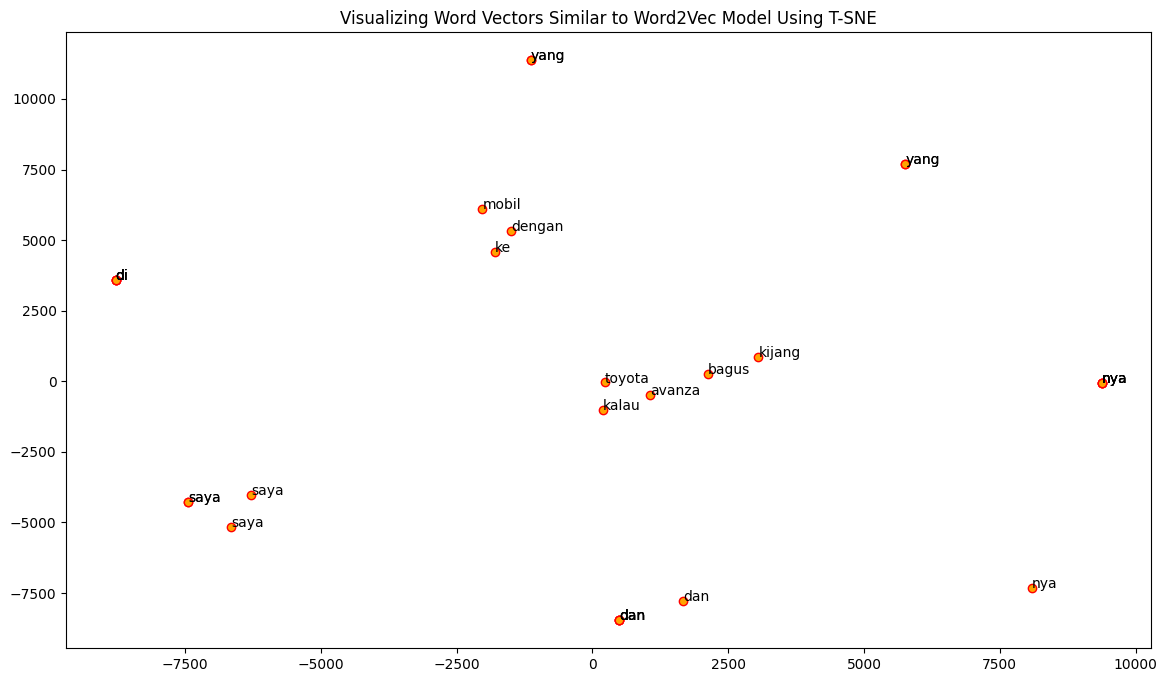

In [31]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.title("Visualizing Word Vectors Similar to Word2Vec Model Using T-SNE")
plt.scatter(T[:, 0], T[:, 1], c="orange", edgecolors="r")
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x + 1, y + 1), xytext=(0, 0), textcoords="offset points")


In [32]:
w2v_model.wv["avanza"]


array([ 0.15342993,  0.00797894,  0.06176183,  0.09685776, -0.06776956,
       -0.04240707,  0.01066983,  0.11672735, -0.00942353,  0.04129828,
        0.0355451 ,  0.0112291 , -0.01232637,  0.03805528,  0.120365  ,
       -0.01586798, -0.06048122, -0.03365948,  0.07640162, -0.20297365,
        0.05812377, -0.0881568 ,  0.01702455, -0.04189563,  0.07084834,
       -0.05209265,  0.09707183, -0.04075962, -0.2622465 ,  0.0930929 ,
        0.11061692, -0.10082017, -0.03559187, -0.07844491,  0.11398142,
       -0.03970724,  0.07248731,  0.01251006, -0.03254425, -0.19510737,
       -0.06691625,  0.02849186, -0.14361435,  0.15942757,  0.01501838,
       -0.04066075, -0.08790865,  0.10685105, -0.0871123 ,  0.08150847,
        0.01244625, -0.03652437, -0.03492343, -0.11328847,  0.03295645,
        0.00150143,  0.05649884, -0.06883373, -0.09245954, -0.0457893 ,
       -0.08638592, -0.0449912 , -0.09185795,  0.0427066 , -0.0038186 ,
        0.11879188,  0.02153721,  0.16629635,  0.00611222, -0.04

<h1>Glove Word Embeddings</h1>

In [33]:
import spacy
## instll tar.gz 
 
glove_file = open("glove.6B.100d.txt", "r", encoding="utf-8")
embedding_index = dict()

for line in glove_file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embedding_index[word] = coefs
    
glove_file.close()
print("Found %s word vectors." % len(embedding_index))

# create embedding matrix
embeddiing_matrix = np.zeros((len(word2id) + 1, embed_size))
for word, i in word2id.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embeddiing_matrix[i] = embedding_vector
print(embeddiing_matrix.shape)

Found 400000 word vectors.
(1576, 100)


/home/nicho/MachineLearningENV/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


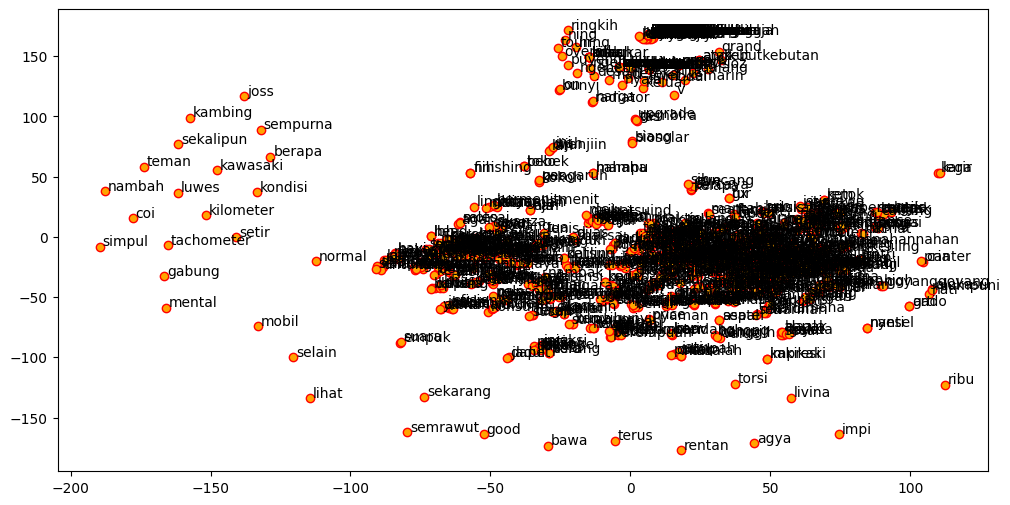

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(embeddiing_matrix[1:])
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c="orange", edgecolors="r")
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x + 1, y + 1), xytext=(0, 0), textcoords="offset points")


,sentence,fuel,machine,others,part,price,service,clean_sentence,ClusterLabel
0,Saya memakai Honda Jazz GK5 tahun 2014 ( pertama meluncur ) . Mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai,neutral,neutral,positive,neutral,neutral,neutral,saya pakai honda jazz gk tahun pertama luncur mobil nya bagus dan enak sesuai moto nya senang untuk kendara,2
1,Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .,negative,neutral,neutral,neutral,neutral,neutral,avanza kenapa jadi boros bensin begini dah ah baru isi sudah mau tengah saja,0
2,"saran ku dan pengalaman ku , mending beli mobil niaga L300 atau canter . irit dan bandel .",positive,positive,neutral,neutral,neutral,neutral,saran ku dan alam ku mending beli mobil niaga l atau canter irit dan bandel,2
3,Dari segi harga juga pajero lebih mahal 30 jutaan dibanding fortuner,neutral,neutral,neutral,neutral,positive,neutral,dari segi harga juga pajero lebih mahal juta banding fortuner,0
4,Kalo menurut gw enak pajero si,neutral,neutral,positive,neutral,neutral,neutral,kalo turut gw enak pajero si,2
...,...,...,...,...,...,...,...,...,...
805,Naik pajero goyang nya parah mending naik inova,neutral,neutral,positive,neutral,neutral,neutral,naik pajero goyang nya parah mending naik inova,0
806,pengalaman berkendara nya sangat menyenangkan pakai Avanza karena suara mesin nya yang halus,neutral,positive,neutral,neutral,neutral,neutral,alam kendara nya sangat senang pakai avanza karena suara mesin nya yang halus,0
807,"agya agak sedikit mengecewakan, gak bagus",neutral,neutral,negative,neutral,neutral,neutral,agya agak sedikit kecewa gak bagus,0
808,Di samping harga nya yang terjangkau motor matic vario irit bahan bakar dan nyaman untuk digunakan dalam melaksanakan kegiatan sehari-hari .,positive,neutral,positive,neutral,positive,neutral,di samping harga nya yang jangkau motor matic vario irit bahan bakar dan nyaman untuk guna dalam laksana giat seharihari,2


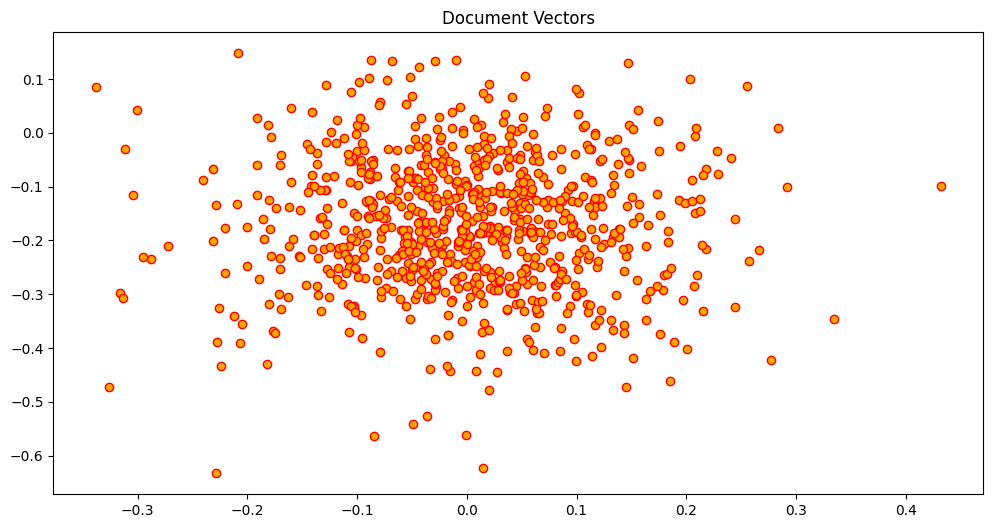

In [37]:
doc_glove_vectors = np.array(
    [np.mean([embeddiing_matrix[word2id[w]] for w in doc.split() if w in word2id], axis=0) for doc in df['clean_sentence']]
)

doc_glove_vectors.shape


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 6))
plt.scatter(doc_glove_vectors[:, 0], doc_glove_vectors[:, 1], c="orange", edgecolors="r")
plt.title("Document Vectors")

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=["ClusterLabel"])
pd.concat([df, cluster_labels], axis=1)



In [38]:
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in df["clean_sentence"]]

feature_size = 100  
window_context = 50  
min_word_count = 5  
sample = 1e-3 


ft_model = FastText(
    sentences=tokenized_corpus, 
    vector_size=feature_size,  
    window=window_context, 
    min_count=min_word_count, 
    sample=sample,  
    epochs=50,  
)

In [39]:
similar_words = {
    search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=5)]
    for search_term in [
    "avanza",
    "mobil",
    "toyota",
    "bagus",
    "kijang",
    
    ]
}
similar_words


{'avanza': ['bagi', 'bagai', 'juga', 'besar', 'tampil'],
 'mobil': ['l', 'kencang', 's', 'kijang', 'kecil'],
 'toyota': ['bukan', 'malah', 'semua', 'ramah', 'daihatsu'],
 'bagus': ['onderdil', 'bakal', 'tentu', 'banyak', 'segala'],
 'kijang': ['mungkin', 'hanya', 'innova', 'kencang', 'milik']}

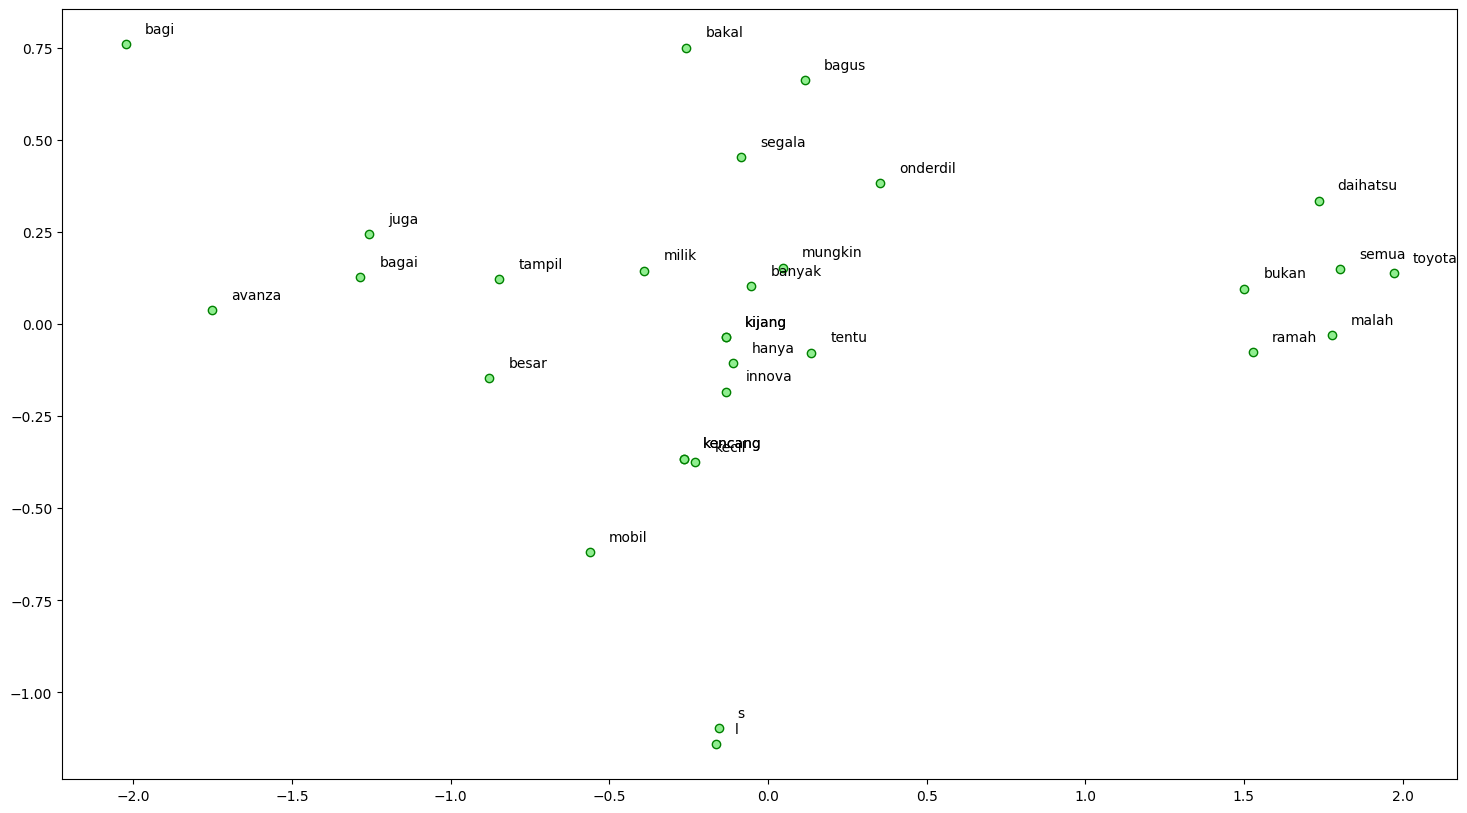

In [40]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c="lightgreen", edgecolors="g")
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(
        label, xy=(x + 0.06, y + 0.03), xytext=(0, 0), textcoords="offset points"
    )


In [41]:
ft_model.wv["avanza"]

array([-0.35500923,  0.02519299, -0.03452397,  0.2422543 ,  0.32445768,
        0.06288321,  0.36804658, -0.22433005,  0.17929076,  0.31079856,
       -0.15667044, -0.17629008, -0.3587846 ,  0.1408688 , -0.5512705 ,
        0.07273398,  0.44343874, -0.11349073, -0.39334953, -0.35910237,
       -0.24799769, -0.3901584 , -0.4534994 ,  0.26418027, -0.28703123,
       -0.3973402 , -0.22712927,  0.04897238, -0.2169791 ,  0.22927304,
       -0.05820101,  0.06878865,  0.16537137, -0.19922237, -0.10009187,
        0.12112916,  0.23401539,  0.07551223, -0.0980658 , -0.16210619,
       -0.27560672,  0.12107637, -0.04603274,  0.5891298 ,  0.24060014,
        0.1163461 , -0.5573648 , -0.21709952, -0.38274702, -0.26361966,
       -0.0834117 ,  0.2251139 , -0.31598538, -0.08266745, -0.0260974 ,
        0.24595077,  0.08481818,  0.08435311,  0.24996743,  0.28528327,
        0.6233678 , -0.08451559, -0.23895553, -0.15365677, -0.42179525,
        0.34150127,  0.45417383,  0.13990857,  0.17963752,  0.12

In [42]:
print(ft_model.wv.similarity(w1="avanza", w2="toyota"))
print(ft_model.wv.similarity(w1="kijang", w2="toyota"))


0.1059869
0.6049462


In [43]:
st1 = "kijang avanza spacy"
st2 = "mobil toyota sangat bagus"
st3 = "mobil avanza sangat murah"

print("kata berbeda[", st1, "]:", ft_model.wv.doesnt_match(st1.split()))

kata berbeda[ kijang avanza spacy ]: spacy
